## Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

For tutorials about plotting in 3D with matplotlib:

- [An easy introduction to 3D plotting with Matplotlib](https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725)
- [Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
- [mplot3d tutorial - matplotlib](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [mplot3d example code: rotate_axes3d_demo.py](https://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html)

# Autonomous systems

An $n$**th-order autonomous continuous-time dynamical system** (i.e. a **"flow"**) is defined by the state equation

\begin{eqnarray}
    \dot{\vec{x}} &=&  \vec{f} (\vec{x}) \nonumber \\
    \vec{x}(t_{0}) &=& \vec{x_{0}}
\end{eqnarray}

where

$$ \dot{\vec{x}} :=  \frac{\mathrm{d}\vec{x}}{\mathrm{d}t} $$

$$ \vec{x}(t) \in \mathbb{R}^{n} \rightarrow \text{Refers to the state of the system at time $t$}$$

$$ \vec{x_{0}} \rightarrow \text{Refers to the initial state (initial condition) of the system at time $t_{0}$}$$

and 

$$ \vec{f} : \mathbb{R}^{n} \to \mathbb{R}^{n} \rightarrow \text{Represents a "vector field"}$$

Since the vector field does not depend on time, the initial time may always be taken as $t_{0} = 0$.

The dependence on the initial condition is important since it defines a trajectory in space $\mathbb{R}^{n}$ and by [existence and uniqueness theorem](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem) one can asure that trajectories in this space do not intersect. So the dependence on the initial condition is shown explicity by writing the solution of (1) as

\begin{equation}
\phi_{t}(\vec{x_{0}})
\end{equation}

The set of points $\{ \phi_{t}(\vec{x_{0}}) : - \infty < t < \infty \}$ is called the trajectory through $x_{0}$.

## Non-autonomous continuous-time dynamical systems

An $n$th-order non-autonomous continuous-time dynamical system is defined by the state equation

\begin{eqnarray}
    \dot{\vec{x}} &=&  \vec{f} (\vec{x}, t) \nonumber \\
    \vec{x}(t_{0}) &=& \vec{x_{0}}
\end{eqnarray}

For non-autonomous systems, the vector field depends on time and unlike the autonomous case, the initial time cannot, in general, be set to $O$. The solution to (3) passing through $\vec{x_{0}}$ at time $t_{0}$ is denoted by:

\begin{equation}
\phi_{t}(\vec{x_{0}}, t_{0})
\end{equation}

If there exists a $T > 0$ such that 

\begin{equation}
\vec{f}(\vec{x}, t) = \vec{f}(\vec{x}, t + T) \qquad \forall \quad \vec{x} \text{ and } t
\end{equation}

then the system is said to be **time periodic** with period $T$. The smallest such $T$ is called **the minimum period**.

##  Converting non-autonomous systems in autonomous systems

An $n$th-order **time-periodic** non-autonomous system with period $T$ can always be converted into an $(n + 1)$th-order autonomous system by appending an extra state

\begin{equation}
\theta := 2 \pi \frac{t}{T}
\end{equation}

The autonomous system is given by

\begin{eqnarray}
    \dot{\vec{x}} = \vec{f} \left(\vec{x}, \theta \frac{T}{2 \pi} \right),
    &\quad&
    \vec{x}(t_{0}) = \vec{x_{0}} \nonumber \\
    \dot{\theta} = \frac{2 \pi}{T},
    &\quad&
    \theta(t_{0}) = 2 \pi \frac{t_{0}}{T}
\end{eqnarray}

Since $\vec{f}$ is time periodic with period $T$, the system (6) is periodic in $\theta$ with period $2 \pi$.

The solution of (6) in the cylindrical state space is

\begin{equation}
\left[
    \begin{array}{c}
      \vec{x}(t) \\
      \theta (t)
    \end{array}
  \right] = \left[
    \begin{array}{c}
      \phi_{t}(\vec{x_{0}}, t_{0}) \\
      \frac{ 2 \pi t}{T} \mod{ 2 \pi}
    \end{array}
  \right]
\end{equation}

where the modulo function restricts $0 \leq \theta < 2 \pi$. Using this transformation, the theory of autonomous systems can be applied to time periodic non-autonomous systems.

## Examples

### Lorenz system

\begin{eqnarray}
    \dot{x} &=& \sigma (y - x),\nonumber \\
    \dot{y} &=& x (\rho - z) - y,\nonumber \\
    \dot{z} &=& x y - \beta z
\end{eqnarray}

produces **chaos** with next parameter values:

\begin{eqnarray}
    \rho &=& 28.0 \nonumber \\
    \sigma &=& 10.0 \nonumber \\
    \beta &=& \frac{8.0}{3.0} \nonumber
\end{eqnarray}

In [2]:
def lorenz(state, t, rho, sigma, beta):
    x, y, z = state  # unpack the state vector
    
    # derivatives
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    
    return dx, dy, dz

<IPython.core.display.Javascript object>


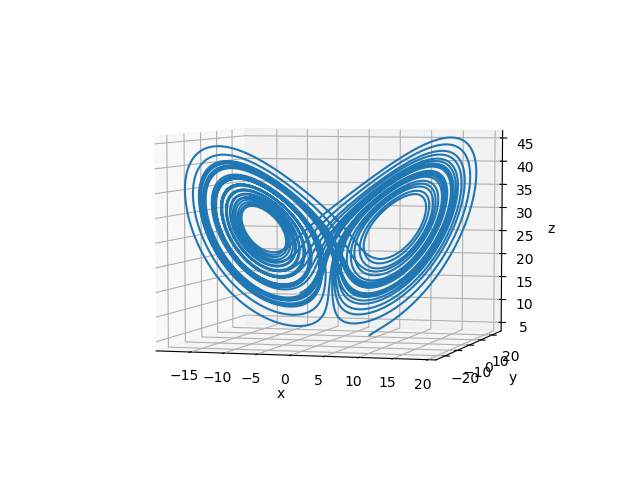

In [5]:
# Define params
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

params = (rho, sigma, beta)

# Initial state
state0 = [5.0, 5.0, 4.0]

# Time vector
t = np.arange(0.0, 40.0, 0.001)

# States (solution)
states = odeint(lorenz, state0, t, args = params)

# Plot
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot3D(states[:, 0], states[:, 1], states[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### Duffing system

\begin{eqnarray}
    \dot{x} &=& y,\nonumber \\
    \dot{y} &=& \alpha x + \beta x^{3} + \epsilon y + \gamma \cos{\omega t}
\end{eqnarray}

**Period:**

\begin{equation}
    T = \frac{2 \pi}{\omega}
\end{equation}

To become into an autonomous system append the extra state:

\begin{equation}
    \theta := 2 \pi \frac{t}{T} = \omega t
\end{equation}

\begin{eqnarray}
    \dot{x} &=& y,\nonumber \\
    \dot{y} &=& \alpha x + \beta x^{3} + \epsilon y + \gamma \cos{\theta}, \nonumber \\
    \dot{\theta} &=& \omega
\end{eqnarray}

The initial condition for $\theta$:

\begin{equation}
    \theta (t_{0}) = \omega t_{0}
\end{equation}

The solution of (6) in the cylindrical state space is

\begin{equation}
\left[
    \begin{array}{c}
      x(t) \\
      y(t) \\
      \theta(t)
    \end{array}
  \right] = \left[
    \begin{array}{c}
      x(t) \\
      y(t) \\
      \omega t \mod{ 2 \pi}
    \end{array}
  \right]
\end{equation}

In [17]:
def duffing(state, t, alpha, beta, epsilon, gamma, omega):
    x, y = state  # unpack the state vector
    
    # derivatives
    dx = y
    dy = alpha * x + beta * x**3 + epsilon * y + gamma * np.cos(omega * t)
    
    return dx, dy


def duffing_3d(state, t, alpha, beta, epsilon, gamma, omega):
    x, y, theta = state  # unpack the state vector
    
    # derivatives
    dx = y
    dy = alpha * x + beta * x**3 + epsilon * y + gamma * np.cos(theta)
    dtheta = omega
    
    return dx, dy, dtheta

<IPython.core.display.Javascript object>


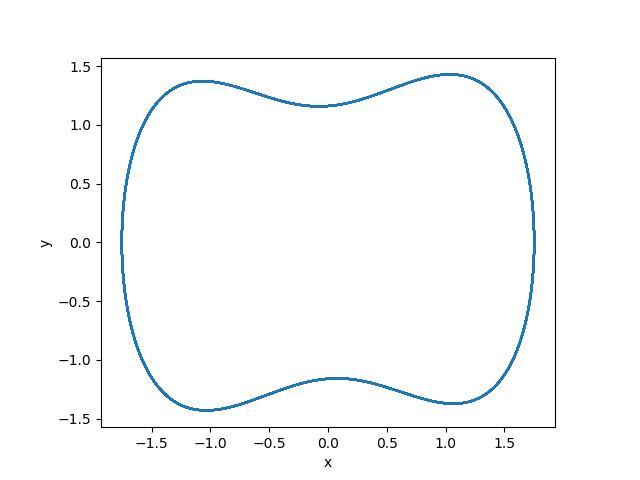

<IPython.core.display.Javascript object>


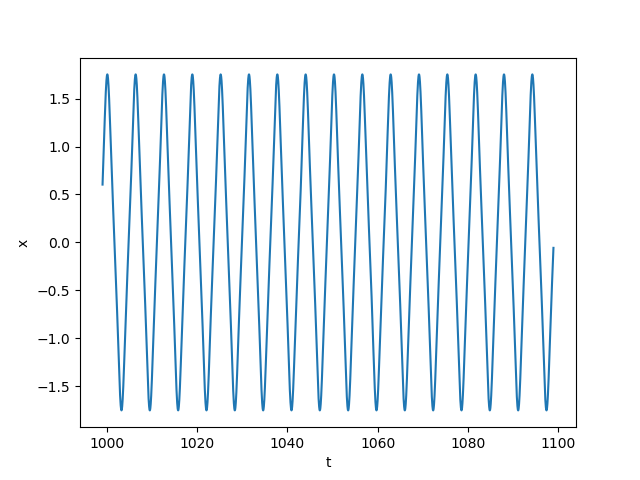

<IPython.core.display.Javascript object>


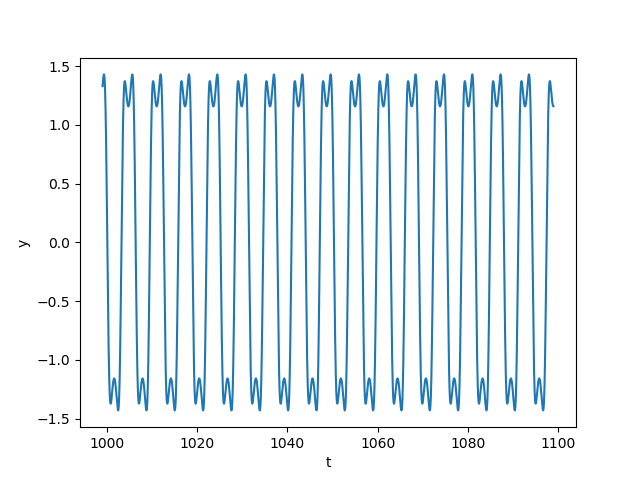

In [11]:
# Define params
alpha = 1.0
beta = -1.0

epsilon = -0.15
gamma = 0.3
omega = 1

params = (alpha, beta, epsilon, gamma, omega)

# Time params
transient_ti = 0.0
transient_tf = 1000.0
n_transient = 1000
transient_dt = (transient_tf - transient_ti)/n_transient

ti = 0.0
tf = 100.0
n = 10000
dt = (tf - ti)/n

# Transient initial state
transient_state0 = [0.0, 1.8]

# Transient time
transient_t = np.arange(transient_ti, transient_tf, transient_dt)

# transient states (solution)
transient_states = odeint(duffing, transient_state0, transient_t, args = params)

# Initial state
state0 = [transient_states[-1, 0], transient_states[-1, 1]]

# Time vector
t = np.arange(transient_t[-1] + ti, transient_t[-1] + tf, dt)

# States (solution)
states = odeint(duffing, state0, t, args = params)

# Plot
fig = plt.figure()
ax = fig.gca()
ax.plot(states[:, 0], states[:, 1])
ax.set_aspect('equal', 'box') # auto-adjusted data limits
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(t, states[:, 0])
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(t, states[:, 1])
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()

In [ ]:
# Transient initial state 3D
transient_state0 = [0.0, 1.8]

# Transient time
transient_t = np.arange(transient_ti, transient_tf, transient_dt)

# transient states (solution)
transient_states = odeint(duffing, transient_state0, transient_t, args = params)

# Initial state
state0 = [transient_states[-1, 0], transient_states[-1, 1]]

# Time vector
t = np.arange(transient_t[-1] + ti, transient_t[-1] + tf, dt)

# States (solution)
states = odeint(duffing, state0, t, args = params)

<IPython.core.display.Javascript object>


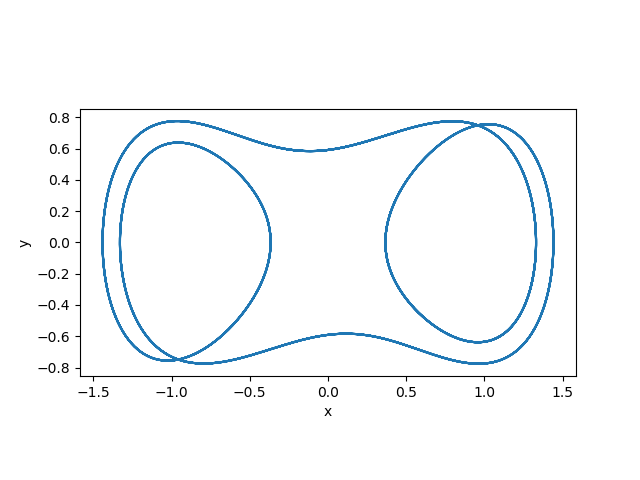

<IPython.core.display.Javascript object>


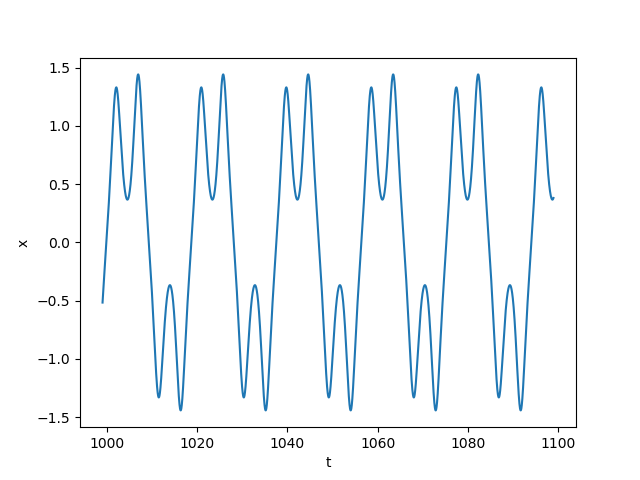

<IPython.core.display.Javascript object>


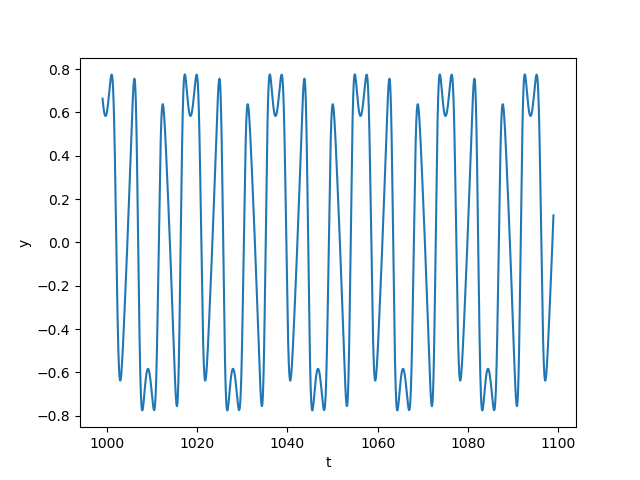

In [12]:
# Define params
alpha = 1.0
beta = -1.0

epsilon = -0.22
gamma = 0.3
omega = 1

params = (alpha, beta, epsilon, gamma, omega)

# Time params
transient_ti = 0.0
transient_tf = 1000.0
n_transient = 1000
transient_dt = (transient_tf - transient_ti)/n_transient

ti = 0.0
tf = 100.0
n = 10000
dt = (tf - ti)/n

# Transient initial state
transient_state0 = [0.0, 0.6]

# Transient time
transient_t = np.arange(transient_ti, transient_tf, transient_dt)

# transient states (solution)
transient_states = odeint(duffing, transient_state0, transient_t, args = params)

# Initial state
state0 = [transient_states[-1, 0], transient_states[-1, 1]]

# Time vector
t = np.arange(transient_t[-1] + ti, transient_t[-1] + tf, dt)

# States (solution)
states = odeint(duffing, state0, t, args = params)

# Plot
fig = plt.figure()
ax = fig.gca()
ax.plot(states[:, 0], states[:, 1])
ax.set_aspect('equal', 'box') # auto-adjusted data limits
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(t, states[:, 0])
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(t, states[:, 1])
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()

<IPython.core.display.Javascript object>


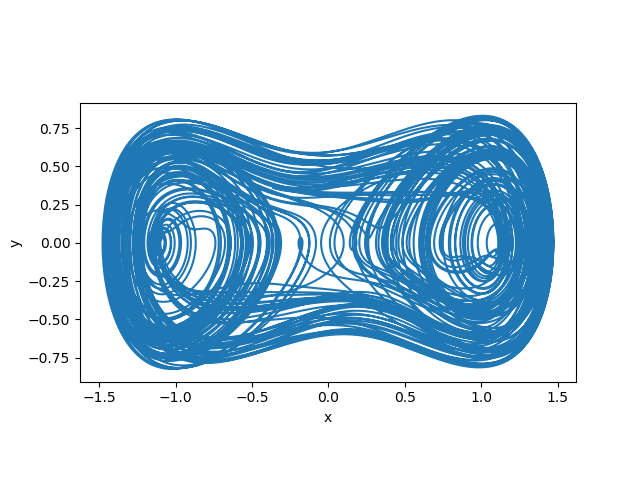

<IPython.core.display.Javascript object>


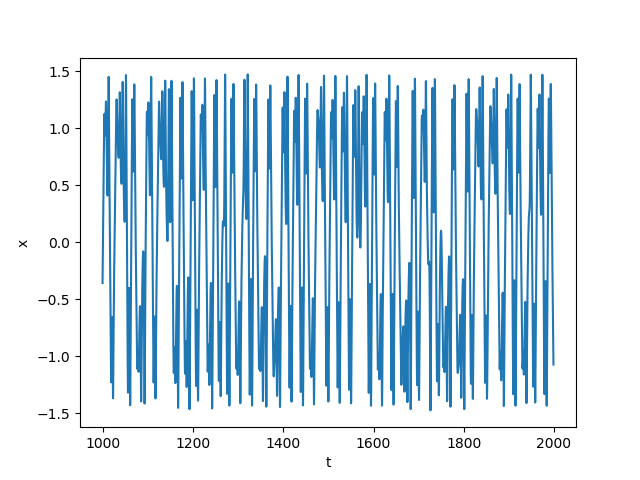

<IPython.core.display.Javascript object>


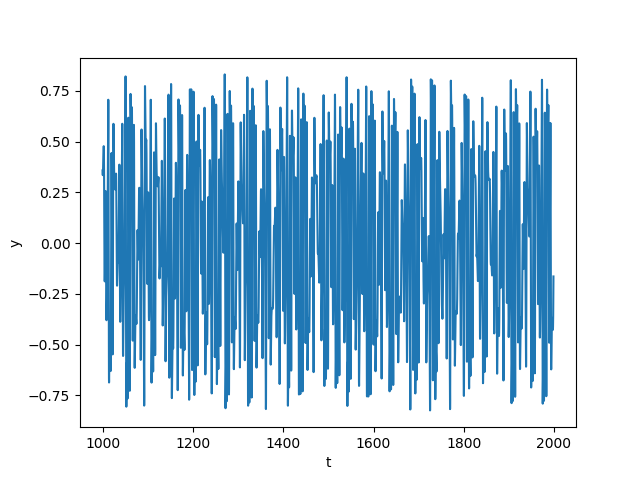

In [15]:
# Define params
alpha = 1.0
beta = -1.0

epsilon = -0.25
gamma = 0.3
omega = 1

params = (alpha, beta, epsilon, gamma, omega)

# Time params
transient_ti = 0.0
transient_tf = 1000.0
n_transient = 1000
transient_dt = (transient_tf - transient_ti)/n_transient

ti = 0.0
tf = 1000.0
n = 100000
dt = (tf - ti)/n

# Transient initial state
transient_state0 = [0.0, 0.6]

# Transient time
transient_t = np.arange(transient_ti, transient_tf, transient_dt)

# transient states (solution)
transient_states = odeint(duffing, transient_state0, transient_t, args = params)

# Initial state
state0 = [transient_states[-1, 0], transient_states[-1, 1]]

# Time vector
t = np.arange(transient_t[-1] + ti, transient_t[-1] + tf, dt)

# States (solution)
states = odeint(duffing, state0, t, args = params)

# Plot
fig = plt.figure()
ax = fig.gca()
ax.plot(states[:, 0], states[:, 1])
ax.set_aspect('equal', 'box') # auto-adjusted data limits
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(t, states[:, 0])
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(t, states[:, 1])
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()

<IPython.core.display.Javascript object>


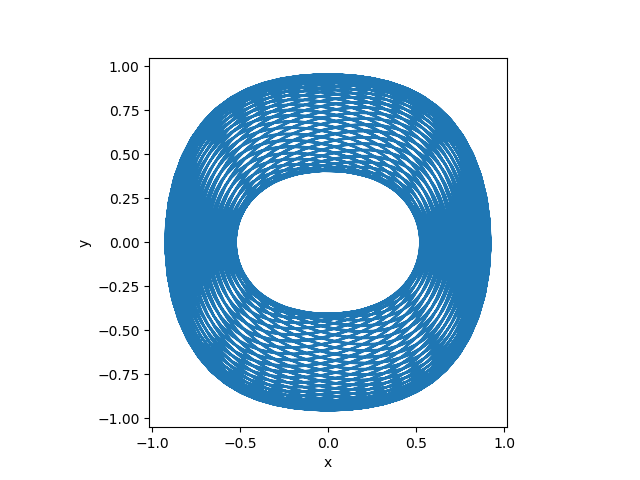

<IPython.core.display.Javascript object>


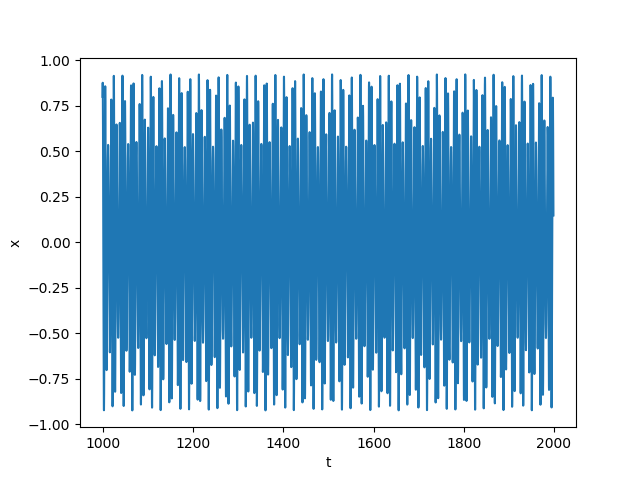

<IPython.core.display.Javascript object>


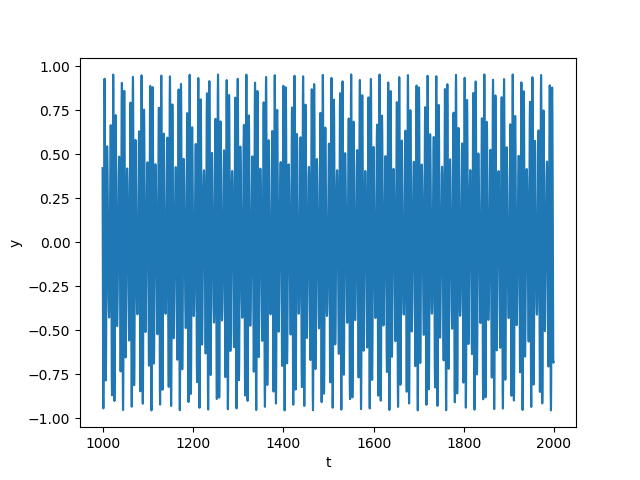

In [16]:
# Define params
alpha = -1.0
beta = -1.0

epsilon = 0.0
gamma = 0.3
omega = 1

params = (alpha, beta, epsilon, gamma, omega)

# Time params
transient_ti = 0.0
transient_tf = 1000.0
n_transient = 1000
transient_dt = (transient_tf - transient_ti)/n_transient

ti = 0.0
tf = 1000.0
n = 10000
dt = (tf - ti)/n

# Transient initial state
transient_state0 = [np.pi/6, 0.0]

# Transient time
transient_t = np.arange(transient_ti, transient_tf, transient_dt)

# transient states (solution)
transient_states = odeint(duffing, transient_state0, transient_t, args = params)

# Initial state
state0 = [transient_states[-1, 0], transient_states[-1, 1]]

# Time vector
t = np.arange(transient_t[-1] + ti, transient_t[-1] + tf, dt)

# States (solution)
states = odeint(duffing, state0, t, args = params)

# Plot
fig = plt.figure()
ax = fig.gca()
ax.plot(states[:, 0], states[:, 1])
ax.set_aspect('equal', 'box') # auto-adjusted data limits
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(t, states[:, 0])
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(t, states[:, 1])
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()

# Poincaré maps

**Reference:** *Practical Numerical Algorithms for Chaotic Systems*. Parker, Thomas S., Chua, Leon. Chapter 2 - Poincaré maps.

![Poincaré 1](img/poincare_1.png)

A **Poincaré section** replaces the flow of an $n$th-order continuous-time system (**flows**) with an $(n - l)$th-order discrete-time system called the **Poincaré map**, so it reduces the dimension of the attractor by one.

In this sense, it is useful to reveal complexity of attractors which are so complex that visual inspection is not useful.

The definition of the **Poincaré map** ensures that its limit sets correspond to limit sets of the underlying flow. The **Poincaré map** has a subset of the same dynamics as the corresponding flow, including **Lyapunov exponents** and **bifurcation behaviour**, except that it is missing the **zero Lyapunov exponent** corresponding to the direction of the flow. 

> The other Lyapunov exponents are the same as for the corresponding flow except multiplied by the average time between succesive intersections.

The **Poincare map**'s usefulness lies in the reduction of order and the fact that it bridges the gap between continuous- and discrete-time systems, revealing the structure of the flow in higher dimensions.

> The **Poincaré map** is usually independent of the section taken, as long as it includes the attractor. the reason is that there is a simple mapping from one section to another that preserves the topology, albeit with stretching and distortion.

The Poincaré section reduces a continuous flow to a discrete-time mapping. However the time interval from point to point is not necessarily constant.

## Algorithms for calculating the Poincare map

### 1.  Choosing the hyperplane $\Sigma$

In a Poincare map program, an $(n - 1)$-dimensional hyperplane $\Sigma$ can be chosen in several ways:

**Method 1.** The user can specify n linearly independent points.

![Plane 0](img/plane_0.png)

**Method 2.** The user can specify a normal vector $\hat{n}$ and a point $\vec{x_{0}}$ on the hyperplane $\Sigma$.

![Plane 1](img/plane_1.png)

> Remember that the equation of the hyperplane can be written as  
> $$ \hat{n} \cdot (\vec{x} - \vec{x_{0}}) = 0 $$

**Method 3.** The user can specify $\vec{x_{0}}$ and let the program choose $\hat{n} = \vec{f}(\vec{x_{0}})$ where $\vec{f}$ is the vector field.

![Plane 2](img/plane_2.png)

**Method 4.** If the program already knows the position of a **limit cycle**, it can choose $\vec{x_{0}} = \vec{x^{*}}$ and $\hat{n} = \vec{f}(\vec{x^{*}})$ where $\vec{x^{*}}$ is any point on the limit cycle.

---

**Methods 1** and **Method 2** give the user full control over the position of the hyperplane and one of them should be included in any **Poincare map program**.

Of these two methods, **Method 1** is perhaps a more natural way of specifying a hyperplane, but **Method 2** requires the user to enter less data.

**Method 3** is less flexible than the first two, but has two advantages:

> 1. The user has to enter less data.  
> 2. The choice of $\hat{n}$ implies that the vector field is orthogonal to $\Sigma$ at $\vec{x_{0}}$. This is advantageous for the algorithms that find hyperplane crossings and that locate limit sets because even though these algorithms require only that the crossings be transversal, they are more accurate and more efficient when the crossings are near orthogonal.

A good compromise is a combination of **Method 2** and **Method 3**:

> If the user specifies $\hat{n}$ and $\vec{x_{0}}$, those values are used.  
> If $\hat{n}$ is not specified, it defaults to $\hat{n} = \vec{f}(\vec{x_{0}})$ unless that is $0$, in which case $\hat{n}$ is set to $\hat{n} = (0, 0, ... , 1)$. The default value for $\vec{x_{0}}$ is $(0, ... , 0)$.

### 2. Location of hyperplane crossings

As we said before, the equation of the hyperplane can be written as  

$$ H(\vec{x}) = \hat{n} \cdot (\vec{x} - \vec{x_{0}}) = 0 $$

To locate next hyperplane crossing of a trajectory $\phi_{t}(\vec{x})$, integrate the trajectory, stopping to calculate $H(\vec{x})$ at every time-step.

Keep integrating until two consecutive points, $\vec{x_{1}} = \phi_{t_{1}}(\vec{x})$ and $\vec{x_{2}} = \phi_{t_{2}}(\vec{x})$, lie on different sides of $\Sigma$, that is, until $H(\vec{x_{1}})$ and $H(\vec{x_{2}})$ are of opposite sign. Mathematically:

$$ H(\vec{x_{1}}) \cdot H(\vec{x_{2}}) < 0 $$

Once $\vec{x_{1}}$ and \vec{x_{2}} are found, the exact crossing is known to be some point

$$ \vec{x^{*}} = \phi_{t^{*}}(\vec{x})$$

with $t_{1} < t^{*} < t_{2}$.

### 3. Find the exact crossing

Implement one of the next methods to find the exact crossing:

- Interpolation
- Time-step halving
- The Newton-Raphson method
- The Henón's method

## Variants

- **Stroboscopic view:** often used for **non-autonomous flows** and most easily done when you choose the numerical integration time step $\mathrm{d}t$ as some integer submultiple of the drive period.

- To plot the other $(n-1)$ variables when the derivative of the $n$th variable is zero, or equivalently when one of the variables reaches a maximum or minimum.

- To plot the maximum value of one of the variables versus its previus maximum.

**Note:**

> Most deterministic rules that impose a constraint on the system suffice unless the resultin map contains no points.


> **Warning:** Do not try to plot the position at arbitrary constant time increments for a **non-autonomous flow**, since the result will be a uniform sampling of the whole attractor rather than a cross-section of it.